In [1]:
import os
import numpy as np

from hydra import initialize, compose
from omegaconf import OmegaConf
from hydra.core.global_hydra import GlobalHydra
import matplotlib.pyplot as plt
from matplotlib import colormaps


In [2]:
def getConfig():
    GlobalHydra.instance().clear()
    initialize(version_base=None, config_path="../configs/", job_name="notebook") 
    cfg = compose(config_name="config")
    return cfg

In [3]:
config = getConfig()
config

{'dataset': {'name': 'conic', 'path': '/mnt/vol3/Datasets/CoNIC/data/', 'saved_images': True}, 'model': {'name': 'resnet18', 'pretrained': True}, 'training': {'epochs': 10, 'batch_size': 32, 'learning_rate': 0.001}, 'other': {'log_print': False}}

In [4]:
images = np.load(os.path.join(config.dataset.path, 'images.npy'))
labels = np.load(os.path.join(config.dataset.path, 'labels.npy'))

print(images.shape)
print(labels.shape)

(4981, 256, 256, 3)
(4981, 256, 256, 2)


In [5]:
index = 4500

image1 =  images[index]
label1 = labels[index]


instance_mask = label1[:,:,0]
segment_mask = label1[:,:,1]


print(np.unique(instance_mask))



[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116]


In [6]:
 # Create a colormap
num_instances = instance_mask.max() + 1  # Number of unique classes
colors = colormaps['hsv'].resampled(num_instances)  # Use a colormap with unique colors

# Generate an RGB image for visualization
colored_image = np.zeros((*instance_mask.shape, 3), dtype=np.float32)
for instance_id in range(1, num_instances):  # Skip the background (assume 0 is background)
    mask = instance_mask == instance_id
    colored_image[mask] = colors(instance_id)[:3]  # Assign RGB from colormap


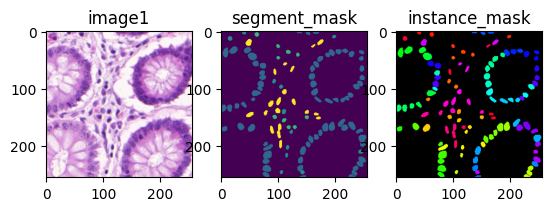

In [7]:
# plot image1, segment_mask, instance_mask
plt.figure()
plt.subplot(1,3,1)
plt.imshow(image1)
plt.title("image1")
plt.subplot(1,3,2)
plt.imshow(segment_mask)
plt.title("segment_mask")
plt.subplot(1,3,3)
plt.imshow(colored_image)
plt.title("instance_mask")
plt.show()